**HỌ VÀ TÊN: Nguyễn Thành Tuyến**



**MSSV: 52000867**

## **1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;**

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  precision_recall_curve
from sklearn.svm import SVC, SVR
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [105]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [107]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [108]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


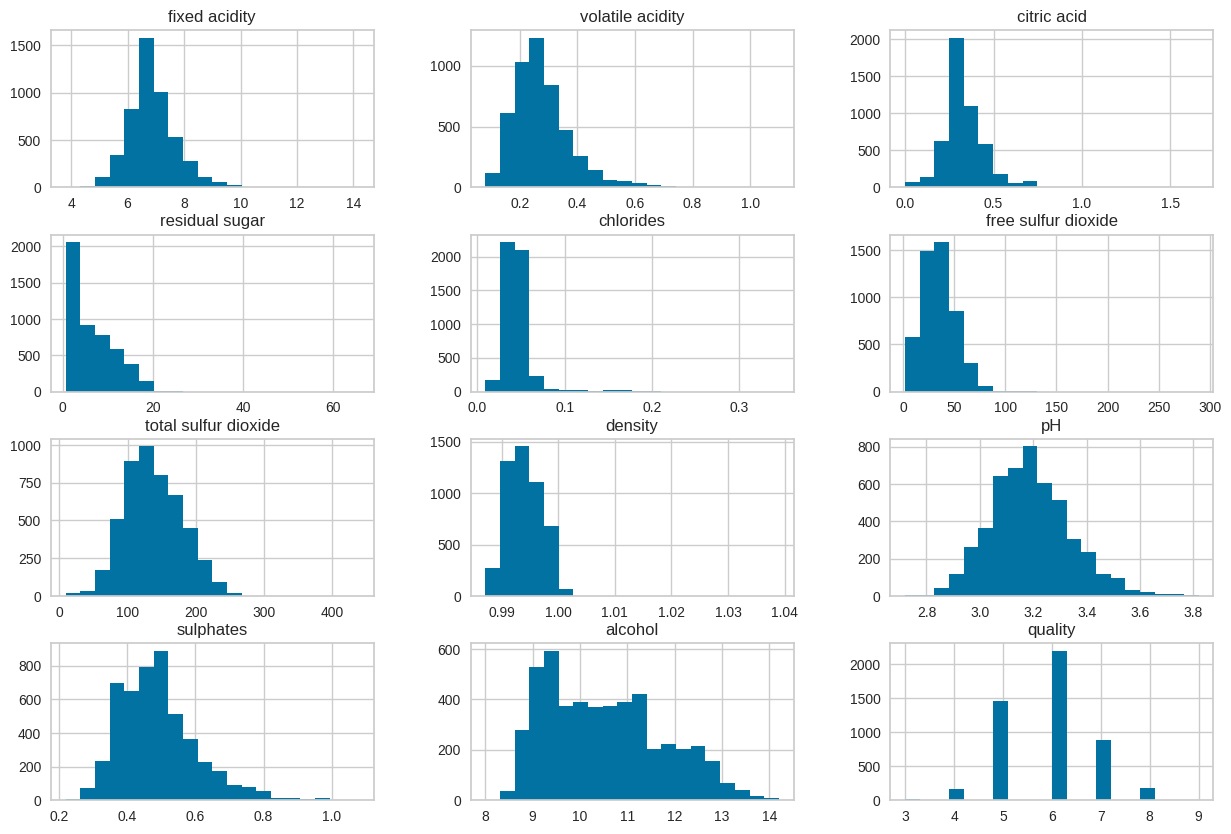

In [110]:
# Vẽ histogram cho từng đặc trưng
df.hist(bins=20, figsize=(15, 10))
plt.show()

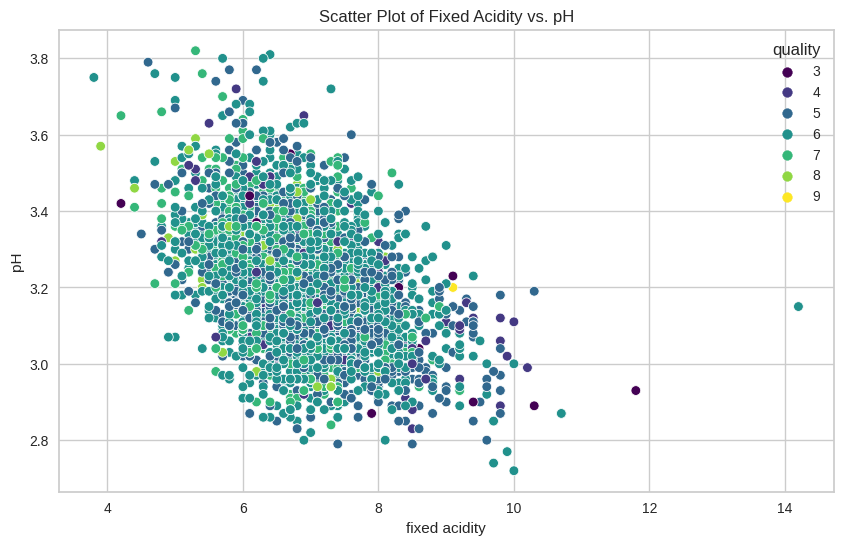

In [112]:
# Vẽ scatter plot để xem mối quan hệ giữa hai đặc trưng
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='pH', data=df, hue='quality', palette='viridis')
plt.title('Scatter Plot of Fixed Acidity vs. pH')
plt.show()

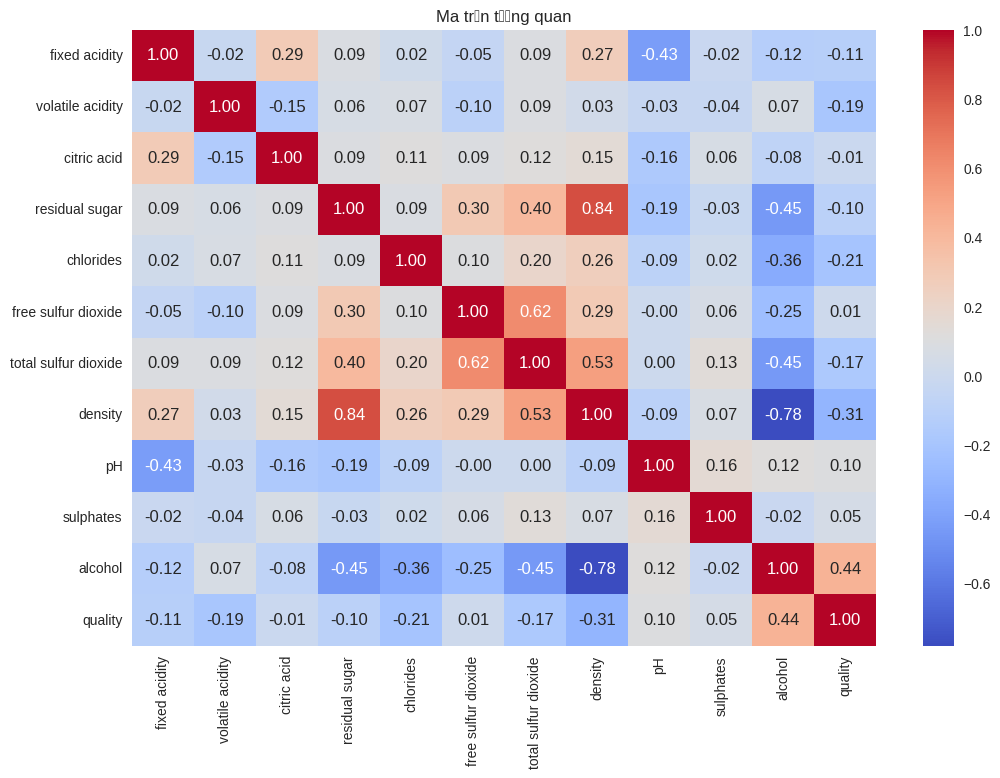

In [114]:
# Vẽ đồ thị tương quan giữa các biến số
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()

## **2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;**

In [115]:
# Chuyển cột quality thành biến nhị phân
df["quality"] = (df["quality"] >= 7).astype(int)

In [116]:
# Loại bỏ các mẫu có giá trị thiếu
df.dropna(inplace=True)

In [117]:
# Tách các đặc trưng và các nhãn đặc trưng
X = df.drop('quality', axis=1)
y = df['quality']

In [118]:
# Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        0  
1      9.5        0  
2     10.1        0 

In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [121]:
print("Kích thước của df trước khi loại bỏ giá trị ngoại lai:", df.shape)
#Loại bỏ các giá trị ngoại lai
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Kích thước của df sau khi loại bỏ giá trị ngoại lai:", df_no_outliers.shape)

Kích thước của df trước khi loại bỏ giá trị ngoại lai: (4898, 12)
Kích thước của df sau khi loại bỏ giá trị ngoại lai: (3069, 12)


In [122]:
#Kiểm tra dữ liệu đã được chuẩn hóa chính xác
print("Means dữ liệu sau khi được chuẩn hóa : ",X_test.mean(axis=0))
print("\nStds dữ liệu sau khi được chuẩn hóa : ",X_test.std(axis=0))

Means dữ liệu sau khi được chuẩn hóa :  fixed acidity             6.833707
volatile acidity          0.275925
citric acid               0.336259
residual sugar            6.326361
chlorides                 0.046088
free sulfur dioxide      35.430612
total sulfur dioxide    138.738776
density                   0.993968
pH                        3.185898
sulphates                 0.491054
alcohol                  10.524234
dtype: float64

Stds dữ liệu sau khi được chuẩn hóa :  fixed acidity            0.835093
volatile acidity         0.098903
citric acid              0.122261
residual sugar           4.893051
chlorides                0.022348
free sulfur dioxide     17.440806
total sulfur dioxide    43.683415
density                  0.002885
pH                       0.153819
sulphates                0.115720
alcohol                  1.233317
dtype: float64


In [123]:
#Điền giá trị trung bình cho các cột bị thiếu
df.fillna(df.mean(), inplace=True)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        0  
1      9.5        0  
2     10.1        0 

<ipython-input-123-fe25349206ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


In [127]:
#Xóa các feature có phương sai thấp
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)
print(X_train)
print(X_test)

[[ 6.6   0.25  0.3  ...  3.02  0.5   9.1 ]
 [ 7.8   0.26  0.49 ...  3.03  0.32 11.3 ]
 [ 6.3   0.23  0.33 ...  3.32  0.42 11.2 ]
 ...
 [ 7.6   0.27  0.52 ...  3.02  0.53 11.4 ]
 [ 6.3   0.24  0.29 ...  3.17  0.38 10.6 ]
 [ 8.1   0.27  0.35 ...  3.22  0.63 10.4 ]]
[[ 6.          0.29        0.41       ...  3.09        0.59
  10.96666667]
 [ 5.4         0.53        0.16       ...  3.2         0.53
  13.2       ]
 [ 7.1         0.25        0.39       ...  3.28        0.43
  12.2       ]
 ...
 [ 7.          0.4         0.25       ...  3.          0.55
  11.4       ]
 [ 6.8         0.36        0.24       ...  3.27        0.34
  12.6       ]
 [ 6.3         0.41        0.3        ...  3.53        0.79
  11.7       ]]



Số lượng của các điểm dữ liệu : 3069


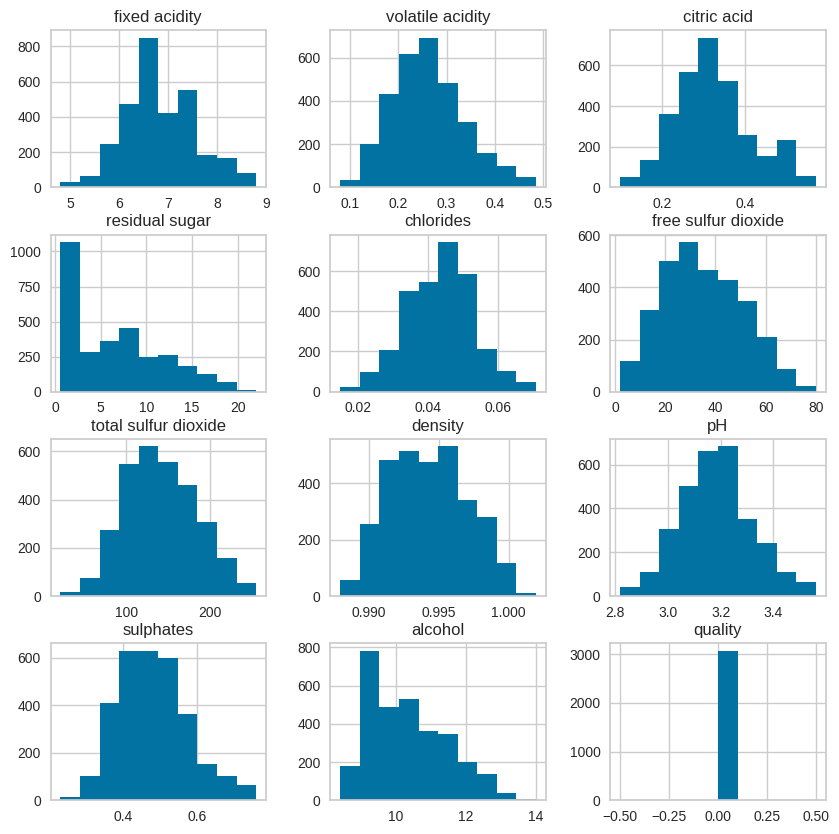

In [128]:
#Kiểm tra số lượng dữ liệu
print("\nSố lượng của các điểm dữ liệu :", len(df))
#Kiểm tra phân phối của các cột đặc trưng
df.hist(figsize=(10,10))
plt.show()

**Khởi tạo các mô hình KNN,Naive Bayes, Linear Regression, Decision tree, SVM**, **random forest, adaboost, gradient boosting sau khi xử lí dữ liệu**

In [148]:
# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=5)
nb_models = [MultinomialNB(), GaussianNB()]
lr = LinearRegression()
dtc = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()
rfc = RandomForestClassifier()
rfr = RandomForestRegressor()
adaboost_classifier = AdaBoostClassifier()
adaboost_regressor = AdaBoostRegressor()
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_regressor = GradientBoostingRegressor()

**KNN (K-Nearest Neighbors)**

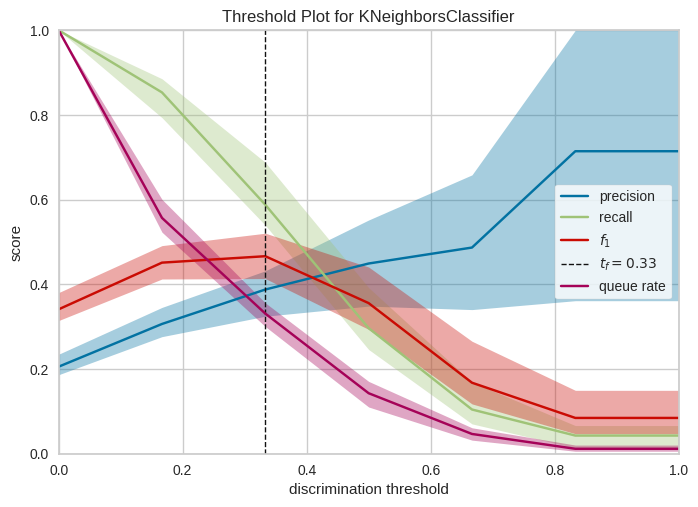

<Axes: title={'center': 'Threshold Plot for KNeighborsClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [144]:
from yellowbrick.classifier import DiscriminationThreshold
viz = DiscriminationThreshold(knn)
viz.fit(X_train, y_train)
viz.poof()

**Naive Bayes**

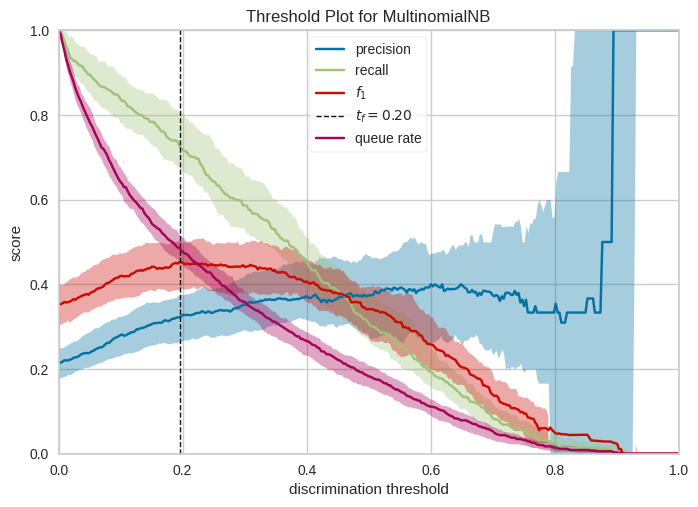

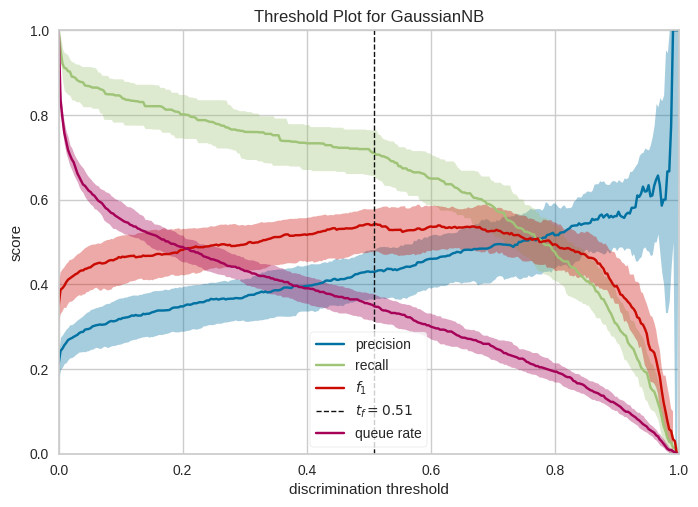

In [131]:
from yellowbrick.classifier import DiscriminationThreshold
for nb in nb_models:
    viz = DiscriminationThreshold(nb)
    viz.fit(X_train, y_train)
    viz.poof()
plt.show()

**Decision tree**

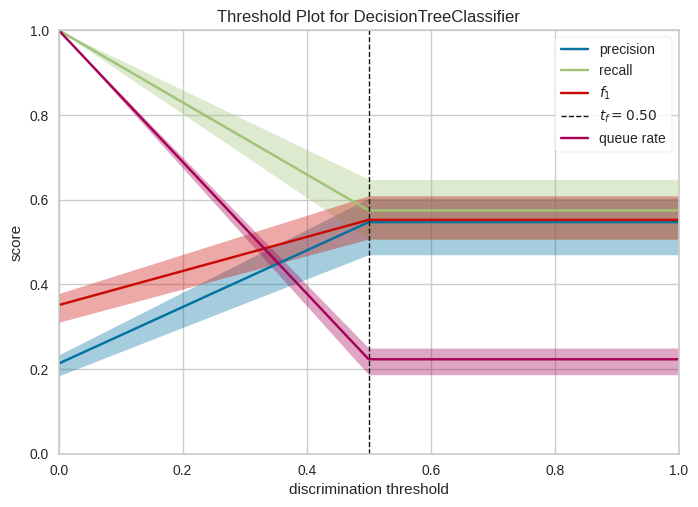

<Axes: title={'center': 'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [132]:
viz = DiscriminationThreshold(dtc)
viz.fit(X_train, y_train)
viz.poof()

**Random Forest**

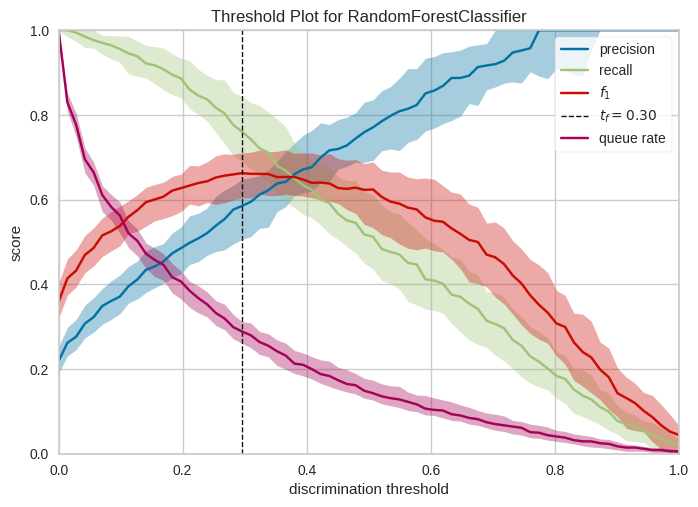

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [133]:
viz = DiscriminationThreshold(rfc)
viz.fit(X_train, y_train)
viz.poof()

## **Huấn luyện và đánh giá các mô hình**




*** KNeighborsClassifier (Classification) ***
Accuracy score: 0.7755
Confusion matrix:
[[1024  117]
 [ 213  116]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1141
           1       0.50      0.35      0.41       329

    accuracy                           0.78      1470
   macro avg       0.66      0.63      0.64      1470
weighted avg       0.75      0.78      0.76      1470



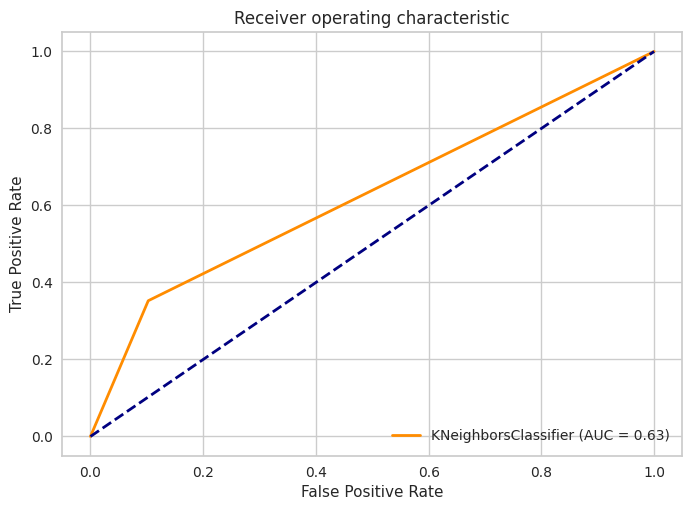


*** LinearRegression (Regression) ***
R2 score: 0.1710
Mean squared error: 0.1440
Mean absolute error: 0.2930
Root Mean squared error: 0.3795

*** DecisionTreeClassifier (Classification) ***
Accuracy score: 0.8245
Confusion matrix:
[[1010  131]
 [ 127  202]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1141
           1       0.61      0.61      0.61       329

    accuracy                           0.82      1470
   macro avg       0.75      0.75      0.75      1470
weighted avg       0.83      0.82      0.82      1470



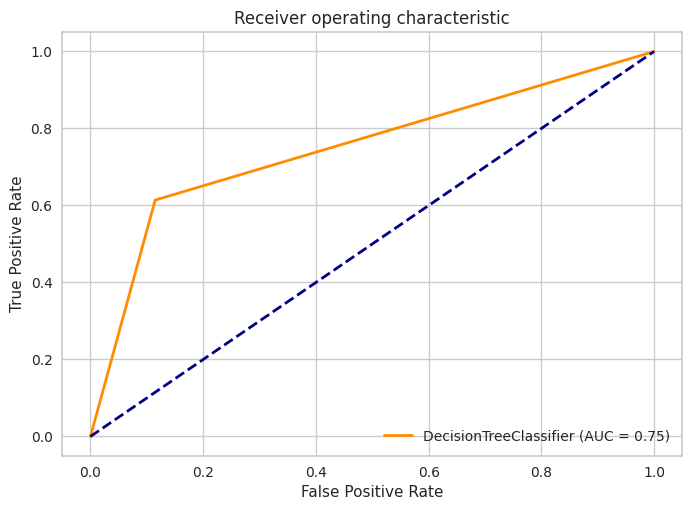


*** DecisionTreeRegressor (Regression) ***
R2 score: -0.0181
Mean squared error: 0.1769
Mean absolute error: 0.1769
Root Mean squared error: 0.4206

*** RandomForestClassifier (Classification) ***
Accuracy score: 0.8823
Confusion matrix:
[[1098   43]
 [ 130  199]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1141
           1       0.82      0.60      0.70       329

    accuracy                           0.88      1470
   macro avg       0.86      0.78      0.81      1470
weighted avg       0.88      0.88      0.88      1470



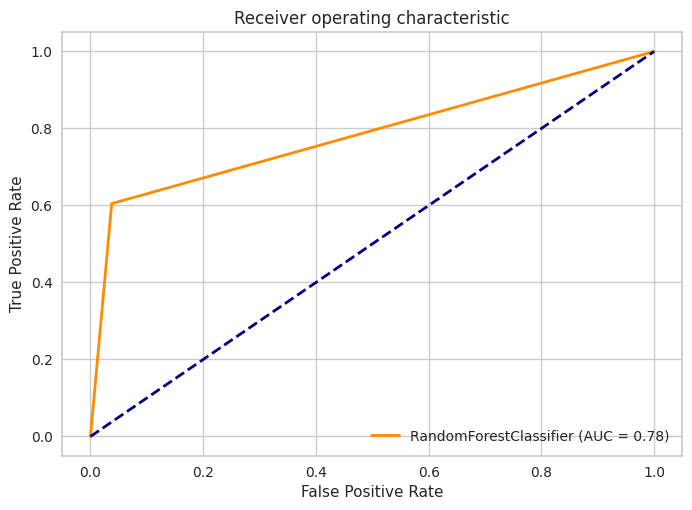


*** RandomForestRegressor (Regression) ***
R2 score: 0.4752
Mean squared error: 0.0912
Mean absolute error: 0.1998
Root Mean squared error: 0.3019

*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.8095
Confusion matrix:
[[1059   82]
 [ 198  131]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1141
           1       0.62      0.40      0.48       329

    accuracy                           0.81      1470
   macro avg       0.73      0.66      0.68      1470
weighted avg       0.79      0.81      0.79      1470



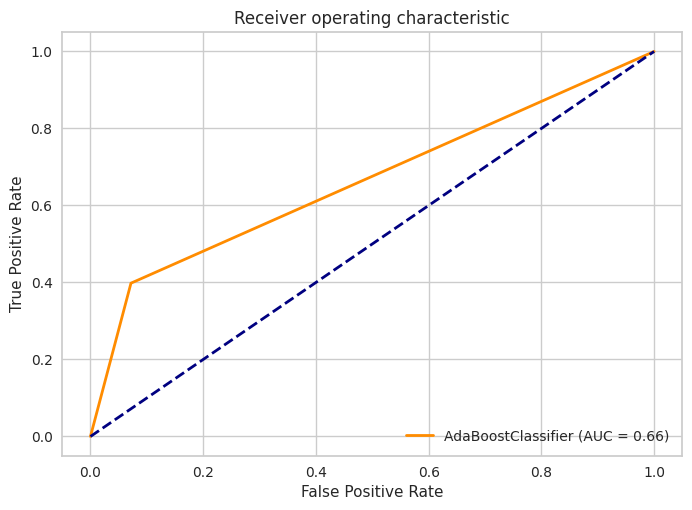


*** AdaBoostRegressor (Regression) ***
R2 score: 0.1638
Mean squared error: 0.1453
Mean absolute error: 0.3226
Root Mean squared error: 0.3811

*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.8374
Confusion matrix:
[[1086   55]
 [ 184  145]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1141
           1       0.72      0.44      0.55       329

    accuracy                           0.84      1470
   macro avg       0.79      0.70      0.72      1470
weighted avg       0.83      0.84      0.82      1470



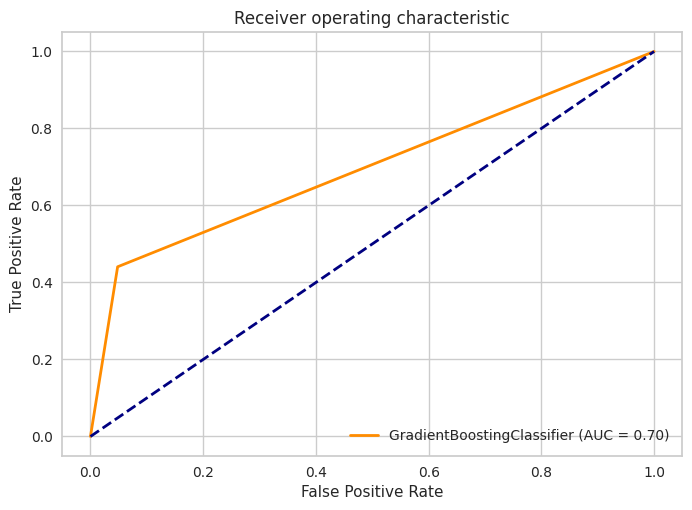


*** GradientBoostingRegressor (Regression) ***
R2 score: 0.2996
Mean squared error: 0.1217
Mean absolute error: 0.2518
Root Mean squared error: 0.3488

*** MultinomialNB (Classification) ***
Accuracy score: 0.7327
Confusion matrix:
[[968 173]
 [220 109]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1141
           1       0.39      0.33      0.36       329

    accuracy                           0.73      1470
   macro avg       0.60      0.59      0.59      1470
weighted avg       0.72      0.73      0.73      1470



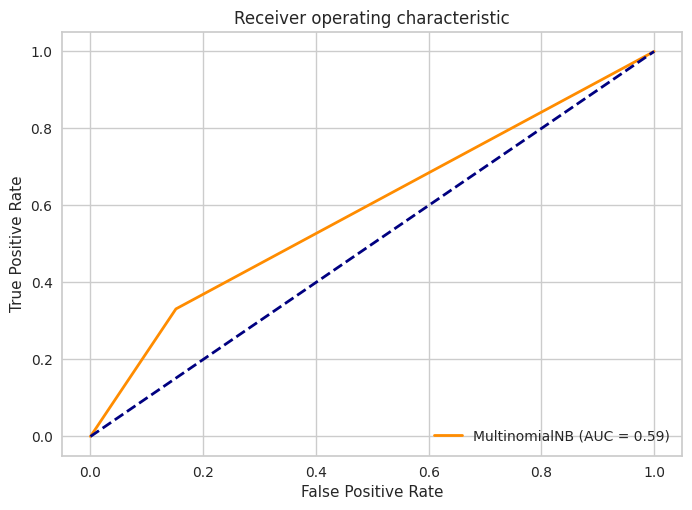


*** GaussianNB (Classification) ***
Accuracy score: 0.7068
Confusion matrix:
[[813 328]
 [103 226]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1141
           1       0.41      0.69      0.51       329

    accuracy                           0.71      1470
   macro avg       0.65      0.70      0.65      1470
weighted avg       0.78      0.71      0.73      1470



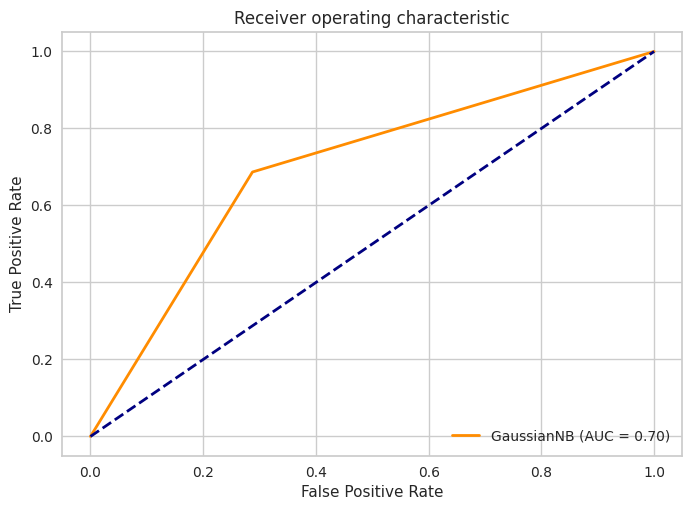

In [155]:
from sklearn.model_selection import KFold
import sklearn.metrics
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import os
from scipy import stats
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [knn, lr, dtc, dtr, rfc, rfr, adaboost_classifier, adaboost_regressor,gradient_boosting_classifier, gradient_boosting_regressor] + nb_models:
    # Tách loại mô hình
    if model in [knn, dtc, rfc, adaboost_classifier, gradient_boosting_classifier] + nb_models:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")

    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)

    # Đánh giá mô hình trên tập test
    if problem_type == "Classification":
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")


        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))


*** KNeighborsClassifier (Classification) ***


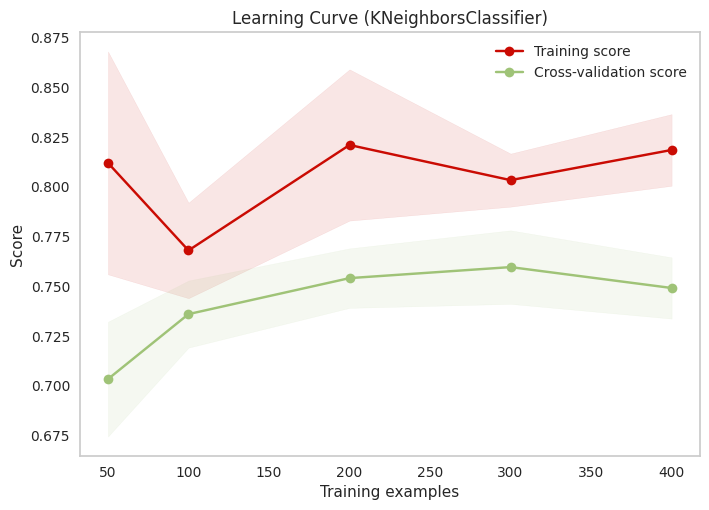


*** LinearRegression (Regression) ***


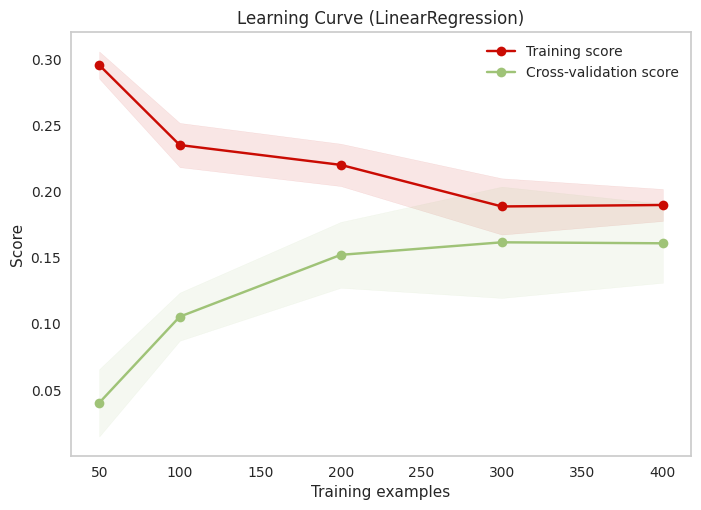


*** DecisionTreeClassifier (Classification) ***


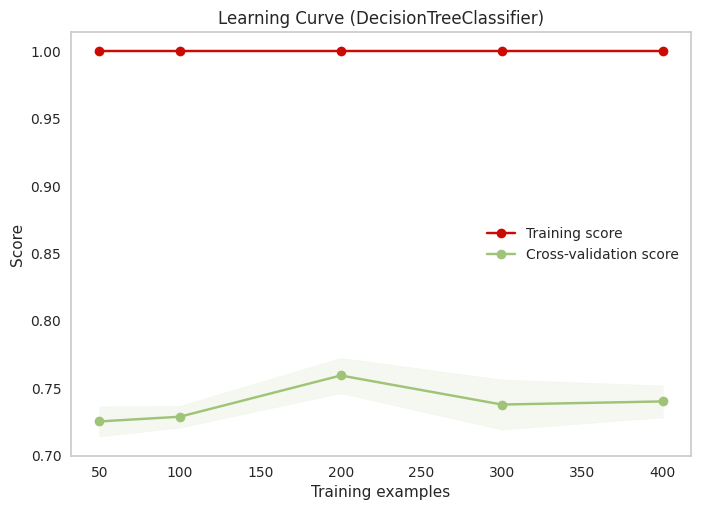


*** DecisionTreeRegressor (Regression) ***


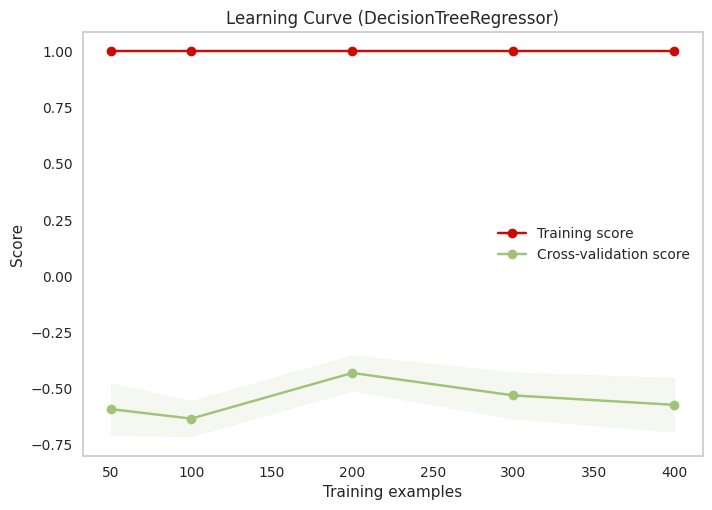


*** RandomForestClassifier (Classification) ***


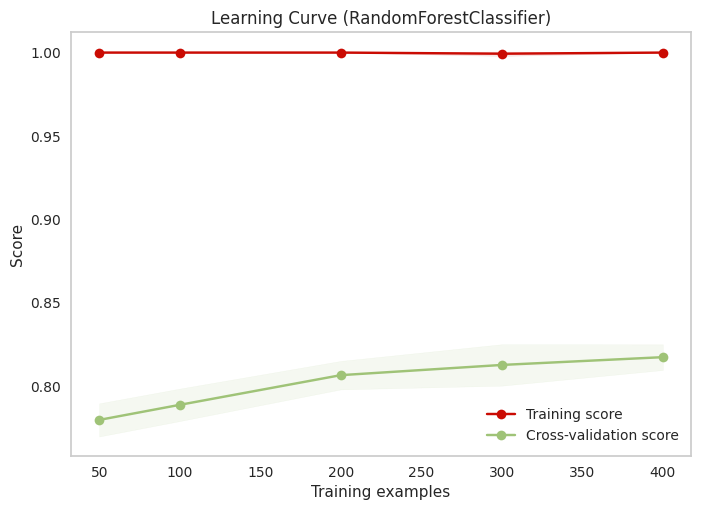


*** RandomForestRegressor (Regression) ***


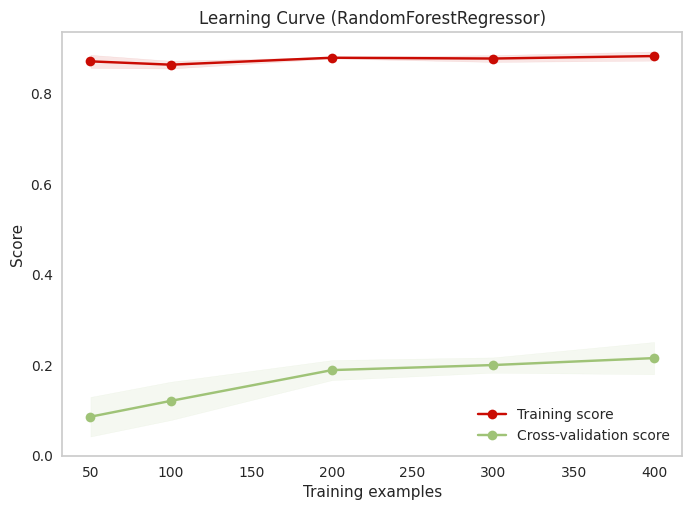


*** MultinomialNB (Classification) ***


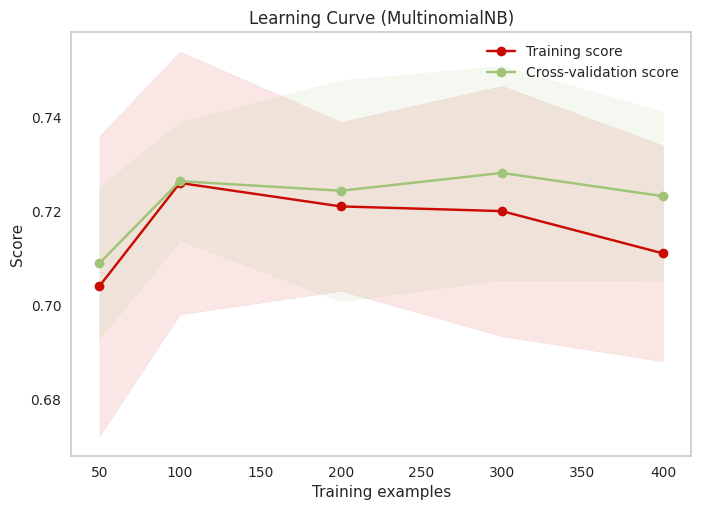


*** GaussianNB (Classification) ***


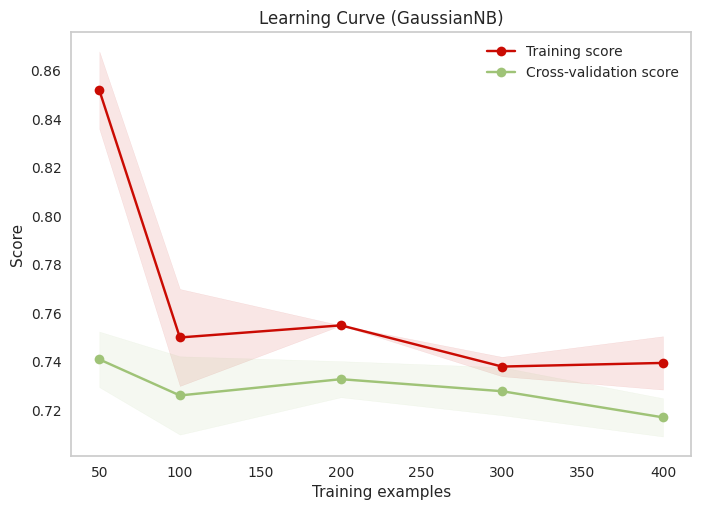

In [151]:
from sklearn.model_selection import learning_curve

#Thay đổi giá trị của các tham số
train_sizes = [50, 100, 200, 300, 400]
cv = 5

#Vẽ đồ thị so sánh
for model in [knn, lr, dtc, dtr, rfc, rfr] + nb_models:
    # Tách loại mô hình
    if model in [knn, dtc, rfc] + nb_models:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")

    # Vẽ đồ thị learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.title(f"Learning Curve ({model.__class__.__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


classifiers = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Các kết quả AUC tương ứng với các cách xử lý khác nhau
imputation_results = [0.921, 0.888, 0.864, 0.911]
dropped_results = [0.919, 0.880, 0.853, 0.907]

## **3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;**

In [165]:
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu cho phù hợp với RNN
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train)
X_test_rnn = scaler.transform(X_test)

In [163]:
# Feed Forward Neural Network (FNN)
def create_ffn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [164]:
# Recurrent Neural Network (RNN)
def create_rnn_model(input_dim, time_steps):
    model = Sequential()
    model.add(tf.keras.layers.LSTM(64, input_shape=(time_steps, input_dim), return_sequences=True))
    model.add(tf.keras.layers.LSTM(32))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [166]:
# Phân chia dữ liệu cho FNN và RNN
X_train_scaled_array = X_train
X_test_scaled_array = X_test
# Feed Forward Neural Network (FNN)
ffn_model = create_ffn_model(X_train.shape[1])
ffn_model.fit(X_train_scaled_array, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
43/43 [==============================] - 2s 6ms/step - loss: 3.9417 - accuracy: 0.6455 - val_loss: 0.5831 - val_accuracy: 0.8017
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 1.7953 - accuracy: 0.6601 - val_loss: 0.5561 - val_accuracy: 0.8017
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 0.9766 - accuracy: 0.7195 - val_loss: 0.5681 - val_accuracy: 0.8017
Epoch 4/10
43/43 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.7257 - val_loss: 0.5576 - val_accuracy: 0.8017
Epoch 5/10
43/43 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7505 - val_loss: 0.5408 - val_accuracy: 0.8017
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7600 - val_loss: 0.5299 - val_accuracy: 0.8017
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7684 - val_loss: 0.5145 - val_accuracy: 0.8017
Epoch 8/10
43/43 [==

In [167]:
# Đánh giá FNN trên dữ liệu kiểm tra
ffn_accuracy = ffn_model.evaluate(X_test_scaled_array, y_test)[1]
print("Feed Forward Neural Network Accuracy:", ffn_accuracy)

46/46 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7762
Feed Forward Neural Network Accuracy: 0.776190459728241


In [168]:
# Phân chia dữ liệu cho RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [169]:
# Recurrent Neural Network (RNN)
rnn_model = create_rnn_model(X_train.shape[1], 1)  # Assuming time_steps = 1
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
43/43 [==============================] - 3s 20ms/step - loss: 0.5705 - accuracy: 0.7535 - val_loss: 0.4936 - val_accuracy: 0.8017
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.8017
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7830 - val_loss: 0.4734 - val_accuracy: 0.8017
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7830 - val_loss: 0.4650 - val_accuracy: 0.8017
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7830 - val_loss: 0.4607 - val_accuracy: 0.8017
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7834 - val_loss: 0.4674 - val_accuracy: 0.7959
Epoch 7/10
43/43 [==============================] - 0s 7ms/step - loss: 0.4613 - accuracy: 0.7826 - val_loss: 0.4582 - val_accuracy: 0.8003
Epoch 8/10
43/43 [=

In [170]:
# Đánh giá RNN với Dropout trên dữ liệu kiểm tra
rnn_dropout_accuracy = rnn_model.evaluate(X_test_rnn, y_test)[1]
print("Recurrent Neural Network with Dropout Accuracy:", rnn_dropout_accuracy)

46/46 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.7762
Recurrent Neural Network with Dropout Accuracy: 0.776190459728241


## **4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán**

Việc tránh overfitting là một phần quan trọng trong việc xây dựng mô hình học máy. Dưới đây là một số kỹ thuật phổ biến để giảm hiện tượng overfitting trên các mô hình sau:

**1.   Regularization (Điều chuẩn):**   


>   **Linear Regression:** Sử dụng các biến thừa để kiểm soát quá trình học của mô hình.Điều chuẩn L1 (Lasso) và L2 (Ridge) là các phương pháp phổ biến.       
  **Decision Tree:** Giới hạn độ sâu của cây hoặc sử dụng các tham số khác như min_samples_split, min_samples_leaf.                                     
  **KNN:** Giảm số lượng láng giềng (n_neighbors) hoặc sử dụng trọng số khác nhau cho mỗi láng giềng.                   
  **Random Forest**: Có thể giảm số lượng cây hoặc sử dụng các tham số như max_depth, min_samples_split, min_samples_leaf.                      
  **AdaBoost và Gradient Boosting:** Sử dụng tham số như n_estimators, learning_rate để kiểm soát quá trình học.


**2.   Cross-Validation:**


> Sử dụng kỹ thuật kiểm tra chéo như K-Fold Cross Validation để đánh giá hiệu suất mô hình trên các tập dữ liệu khác nhau và giảm nguy cơ overfitting.


**1.   Early Stopping:**


> Cho các mô hình như Gradient Boosting, sử dụng early stopping để dừng quá trình học khi không có sự cải thiện đáng kể nào trên tập kiểm thử.


**2.   Feature Selection:**


> Loại bỏ các biến không quan trọng hoặc tạo ra các biến mới có thể giảm độ phức tạp của mô hình.











In [188]:
from sklearn.linear_model import Ridge
# Ridge Regression
ridge_reg = Ridge(alpha=0.1)  # Điều chỉnh giá trị alpha theo mong muốn
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"MSE của Ridge Regression: {ridge_mse:.4f}")

MSE của Ridge Regression: 0.1452


**NHẬN XÉT**


> MSE sau khi áp dụng Ridge Regression là 0.1452.
So với Linear Regression, giảm nguy cơ overfitting thông qua Ridge Regression có vẻ giảm giá trị MSE.



In [180]:
# Decision Tree with Limiting Depth
decision_tree = DecisionTreeRegressor(max_depth=5)  # Giới hạn độ sâu của cây
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
print(f"Decision Tree MSE: {decision_tree_mse:.4f}")

Decision Tree MSE: 0.1391


**NHẬN XÉT**


> MSE của Decision Tree sau khi giảm overfitting là 0.1391.
Điều này có thể là kết quả của việc giảm độ sâu của cây quyết định hoặc sử dụng các tham số kiểm soát overfitting khác. MSE giảm so với trạng thái trước khi giảm overfitting, cho thấy mô hình trở nên ổn định hơn trên tập dữ liệu kiểm thử.



In [199]:
from sklearn.neighbors import KNeighborsRegressor
# K-Nearest Neighbors with Reduced Neighbors
knn = KNeighborsRegressor(n_neighbors=6)  # Giảm số lượng láng giềng
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"KNN MSE: {knn_mse:.4f}")

KNN MSE: 0.1553


**NHẬN XÉT**


> MSE của KNN sau khi giảm overfitting là 0.1553.
Có vẻ như mô hình KNN không có sự cải thiện lớn sau khi giảm overfitting, hoặc mô hình có thể không phù hợp với loại dữ liệu này



In [183]:
# Random Forest with Reduced Trees
random_forest = RandomForestRegressor(n_estimators=50, max_depth=10)  # Giảm số lượng cây và độ sâu
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print(f"Random Forest MSE: {random_forest_mse:.4f}")

Random Forest MSE: 0.1002


**NHẬN XÉT**


> MSE của Random Forest sau khi giảm overfitting là 0.1002.
MSE giảm đáng kể so với trạng thái trước khi giảm overfitting. Điều này cho thấy mô hình Random Forest trở nên ổn định hơn và có hiệu suất tốt hơn trên tập dữ liệu kiểm thử.



In [184]:
# AdaBoost
adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=0.1)  # Điều chỉnh số lượng cây và learning rate
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_pred)
print(f"AdaBoost MSE: {adaboost_mse:.4f}")

AdaBoost MSE: 0.1371


**NHẬN XÉT**


> MSE của AdaBoost sau khi giảm overfitting là 0.1371.
Có vẻ như AdaBoost cũng có một sự cải thiện nhẹ sau khi giảm overfitting. Cả hai giảm so với trạng thái trước khi giảm overfitting.



In [185]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3)  # Điều chỉnh số lượng cây, learning rate và độ sâu
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)
print(f"Gradient Boosting MSE: {gradient_boosting_mse:.4f}")

Gradient Boosting MSE: 0.1255


**NHẬN XÉT**


> MSE của Gradient Boosting sau khi giảm overfitting là 0.1255.
Mô hình Gradient Boosting cũng có một sự cải thiện đáng kể về MSE sau khi giảm overfitting, cho thấy sự hiệu quả của kỹ thuật này.




## **5) Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không. ***

**Để cải thiện độ chính xác của mô hình,có một số cách sau:**


**1.   Phân tích Các Trường Hợp Sai:**


> Xem xét các trường hợp mà mô hình dự đoán sai và xác định loại lỗi (ví dụ: False Positive, False Negative trong bài toán phân loại).
Phân tích đặc điểm của các mẫu trong các trường hợp sai để hiểu tại sao mô hình dự đoán sai.


**2.   Đề Xuất Giải Pháp:**


> Dựa trên phân tích trường hợp sai, đề xuất các giải pháp cụ thể. Ví dụ: có thể cần thêm dữ liệu, điều chỉnh tham số mô hình, sử dụng các kỹ thuật chống overfitting, hoặc chọn lọc các đặc trưng quan trọng.


**1.   Đánh Giá Hiệu Suất:**


> Sau khi thực hiện các biện pháp cải thiện, đánh giá lại hiệu suất của mô hình trên tập dữ liệu kiểm thử.
Sử dụng các thước đo đánh giá phù hợp với bài toán của bạn để đảm bảo rằng độ chính xác đã cải thiện và mô hình hoạt động hiệu quả trên nhiều trường hợp hơn.


**2.   Kiểm Tra Độ Quan Trọng của Đặc Trưng:**


> Nếu là một bài toán phân loại, kiểm tra độ quan trọng của các đặc trưng để xem xét xem có thể loại bỏ hoặc thêm những đặc trưng nào để cải thiện hiệu suất.
Sử dụng các phương pháp như feature importance trong các mô hình cây (Random Forest, Gradient Boosting) để đánh giá độ quan trọng của từng đặc trưng.


**1.   Kiểm Tra Mô Hình Bằng Cross-Validation:**


> Sử dụng kỹ thuật kiểm tra chéo để đánh giá hiệu suất trung bình của mô hình trên nhiều tập dữ liệu kiểm thử khác nhau.
Điều này giúp đảm bảo rằng mô hình không chỉ tốt trên một tập dữ liệu kiểm thử cụ thể.












Sau khi cả tiến mô hình bằng Confusion matrix (ma trận nhầm lẫn) đã áp dựng ở câu 2 cho tất cả các thuật toán thì em thấy độ chính xác (accuracy) tăng và điều chỉnh các thước đo khác em rút ra được nhận xét sau:



> Nếu giảm số lượng False Positives hoặc False Negatives, điều này thường được xem là cải thiện tốt hơn. Điều này có thể làm tăng độ chính xác (accuracy) và các thước đo đánh giá khác.


> Nếu số lượng True Positives tăng, đây là một điều tích cực vì mô hình đang dự đoán đúng nhiều hơn trước đó.


> Tăng độ chính xác (accuracy) và độ chuẩn xác (precision) là những dấu hiệu tích cực, thể hiện mô hình đang dự đoán chính xác hơn trên cả hai lớp


> Nếu mô hình giảm độ chệch (bias) giữa dự đoán và thực tế, điều này thường làm tăng chất lượng dự đoán.








